# Step 1. Reload files & Import Modules - 匯入模組

## 1-1. Reload files - 重讀檔案

In [1]:
import sys
print(sys.version)

3.10.13 (main, Sep 11 2023, 08:24:56) [Clang 14.0.6 ]


In [1]:
# reload file if you eaited them
import crawler, crawler104, config.search_params, threaded_async_job, jobs104
import data_lake, data_warehouse, translation, data_analysis

import importlib
importlib.reload(crawler)
importlib.reload(crawler104)
importlib.reload(threaded_async_job)
importlib.reload(jobs104)
importlib.reload(config.search_params)
importlib.reload(data_lake)
importlib.reload(data_warehouse)
importlib.reload(translation)
importlib.reload(data_analysis)

<module 'data_analysis' from '/Users/rekam/develop/jobscan/dags/data_analysis.py'>

## 1-2. Import Modules - 匯入模組

In [2]:
# import library
from crawler import Crawler
from crawler104 import Crawler104
from config.search_params import get_filter_params
from data_lake import DataLake
from data_warehouse import DataWarehouse
from data_analysis import DataAnalysis
import matplotlib.pyplot as plt

In [3]:
# 快速執行 reload & import
%run imports.py

# Step 2. Data Source - 爬蟲抓資料

## 2-1. Filter Setting - 過濾條件

In [4]:
# 設定連線方式
remote=True
diff_container=False

In [6]:
%run imports.py
def get_crawler104():
    global remote, diff_container
    # 設定爬蟲完之前的篩選條件 (for website)
    # custom filter params for search - for yidti
    role = {'ro':'全職'}
    keyword = {'keyword':"後端工程師 python"}
    # area = {'area':['新北市', '台北市', '桃園市', '台中市']}
    isnew = {'isnew':'三日內'}
    jobexp = {'jobexp':['1年以下', '1-3年']}
    # 預設
    mode = {'mode':'列表'}  # 一次能呈現比較多筆資料
    order = {'order':'日期排序'}
    asc = {'asc':'遞減'}
    filter_params = get_filter_params(role, keyword, isnew, jobexp, mode, order, asc)
    # user & title
    user = "yidti"
    title = "data_Engineer"
    # 執行jupyter的時候在本機,遠端Remote連到 Docker的Chrome執行
    crawler104 = Crawler104(filter_params, user, title, remote=remote, diff_container=diff_container)

    # 設定爬蟲完之後的篩選條件(for data)
    # keywords for filter job again
    job_keywords = ('工程','資料','python','data','數據','後端')
    # Exclude keywords to filter out companies related to gambling or others that I don't want to consider.
    company_exclude = ('新加坡商冕創有限公司','新博軟體開發股份有限公司','現觀科技股份有限公司'
                       ,'全富數位有限公司','杰思數位有限公司','博凡星國際有限公司',
                      '尊博科技股份有限公司','新騎資訊有限公司','新加坡商鈦坦科技股份有限公司台灣分公司',
                       '豪穎科技股份有限公司','塶樂微創有限公司','磐弈有限公司',
                       '聯訊網路有限公司','冶金數位科技有限公司','肥貓科技有限公司',
                       '無名科技有限公司','博澭科技有限公司','緯雲股份有限公司',
                       '風采有限公司','英屬維京群島商嘉碼科技有限公司台灣分公司',
                       '冠宇數位科技股份有限公司','英仕國際有限公司','元遊科技有限公司',
                       '禾碩資訊股份有限公司','向上集團_向上國際科技股份有限公司',
                       '弈樂科技股份有限公司','馬來西亞商極限電腦科技有限公司台灣分公司',
                       '樂夠科技有限公司','威智國際有限公司','紅信科技有限公司',
                       '深思設計有限公司','揚帆科技有限公司','晶要資訊有限公司',
                       '九七科技股份有限公司','臣悅科技有限公司','尊承科技股份有限公司',
                       '遊戲河流有限公司','唐傳有限公司','捷訊資訊有限公司',
                       '逍遙遊科技有限公司','澄果資訊服務有限公司','果遊科技有限公司',
                       '昱泉國際股份有限公司','博星數位股份有限公司',
                      )
    print(f"設定排除{len(company_exclude)}家公司")
    crawler104.set_filter(job_keywords, company_exclude)
    
    return crawler104


## 2-2. Web Crawler - 抓取Jobs清單

In [7]:
# chrome for testing -> https://googlechromelabs.github.io/chrome-for-testing/
%run imports.py
crawler104 = get_crawler104()
crawler104.run()

設定排除44家公司
Chrome driver is available.
Start Crawling
url: https://www.104.com.tw/jobs/search/?ro=1&keyword=%E5%BE%8C%E7%AB%AF%E5%B7%A5%E7%A8%8B%E5%B8%AB+python&isnew=3&jobexp=1%2C3&mode=l&order=16&asc=0


Loading: 100%|██████████| 100/100 [03:00<00:00,  1.81s/page]


載入100頁 | 載入2965筆資料 | 過濾剩2191筆資料 | 花費 189.9 秒


## 2-3. Web Scraper - 抓取Jobs內容(異步&多線程)

In [8]:
%run imports.py
crawler104 = get_crawler104()
crawler104.detail()
# remote chrome docker (10 node) =  2250 jobs / 852.56 sec = 2.63 job/s
# local chrome docker = 2204 jobs / 860.34 sec = 2.56 job/s

設定排除44家公司
Crawler temp file not found.
目標2212筆 | 排除一週內更新，過濾剩374筆資料 | 排除無效連結或關閉職缺，過濾剩374筆資料


Processing jobs: 100%|██████████| 374/374 [02:30<00:00,  2.49job/s]


Scraping Details for 374 Jobs | Crawler temp file not found.
目標2212筆 | 排除一週內更新，過濾剩0筆資料 | 排除無效連結或關閉職缺，過濾剩0筆資料


Processing jobs: 0job [00:00, ?job/s]

Scraping Details for 0 Jobs | 無需更新
花費 150.13 秒


## 2-3. Export Flie - 輸出至Excel

In [9]:
# output to excel file (job)
%run imports.py
crawler104 = get_crawler104()
crawler104.export_excel()

設定排除44家公司
Excel文件儲存成功: output//yidti_data_Engineer_2024_05.xlsx


# Step 3. Data Lake - 資料存入NoSQL

In [31]:
# ouput to noSQL (job, company, industry)
%run imports.py
crawler104 = get_crawler104()
data_lake = DataLake(crawler104)
data_lake.save_nosql()
data_lake.filter()

設定排除44家公司
Update 2314 records, Insert 0 records in jobs_104 collection
job keywords - 已刪除不符合關鍵字的文件數量: 0
company exclude - 已刪除符合條件的文件數量: 0


# Step 4 - Data Warehouse - 資料存入MySQL

In [64]:
%run imports.py
crawler104 = get_crawler104()
data_lake = DataLake(crawler104)
data_Warehouse = DataWarehouse(data_lake)
data_Warehouse.save_sql()

設定排除44家公司
localhost root test 3308
DB is created (job_db)
createDB
Successfully executed SQL script
Successfully executed SQL script
無須更新:company
無須更新:industry
無須更新:location_city_region
無須更新:location
無須更新:experience
無須更新:education
無須更新:category_item
無須更新:category
無須更新:major_item
無須更新:major
無須更新:language_item
無須更新:language
無須更新:tool_item
無須更新:tool
無須更新:skill_item
無須更新:skill
無須更新:benefits
無須更新:type
無須更新:management
無須更新:business_trip
無須更新:working_hours
無須更新:vacation
無須更新:available
無須更新:quantity
無須更新:job_info


# Step 5 - Exploratory Data Analysis (EDA) - 探索性資料分析

## 5-1 - Get Data

In [56]:
# 快速執行 reload & import
%run imports.py
crawler104 = get_crawler104()
data_lake = DataLake(crawler104)
data_Warehouse = DataWarehouse(data_lake)
da = DataAnalysis(data_Warehouse)
import pandas as pd

# 抓取 education
t1_columns = ["job_id"]  # 事實表要選擇的欄位名稱列表
t2_columns = ["education"]  # 維度表要選擇的欄位名稱列表
df_education = da.merge_data("job_info", "education", "education_id", "id", t1_columns, t2_columns)

# 抓取 city
t1_columns = ["job_id"]  # 事實表要選擇的欄位名稱列表
t2_columns = ["city_region_id"]  # 維度表要選擇的欄位名稱列表
df_location = da.merge_data("job_info", "location", "location_id", "id", t1_columns, t2_columns)

t1_columns = ["city_region_id"]  # 事實表要選擇的欄位名稱列表
t2_columns = ["city", "region"]  # 維度表要選擇的欄位名稱列表
df_city_region = da.merge_data("location", "location_city_region", "city_region_id", "id", t1_columns, t2_columns)

df_city = pd.merge(df_location, df_city_region, on="city_region_id", how ="left").drop_duplicates(subset='job_id')
# 抓取 major
df_major = da.read_sql("major")
df_major = df_major.rename(columns ={"major_item":"major"})
# 抓取 skill
df_skill = da.read_sql("skill")
df_skill = df_skill.rename(columns ={"skill_item":"skill"})
# 抓取 tool
df_tool = da.read_sql("tool")
df_tool = df_tool.rename(columns ={"tool_item":"tool"})

設定排除44家公司
localhost root test 3308
DB is created (job_db)
Successfully executed SQL script
Successfully executed SQL script


## 5-2 - Count Bar Chart

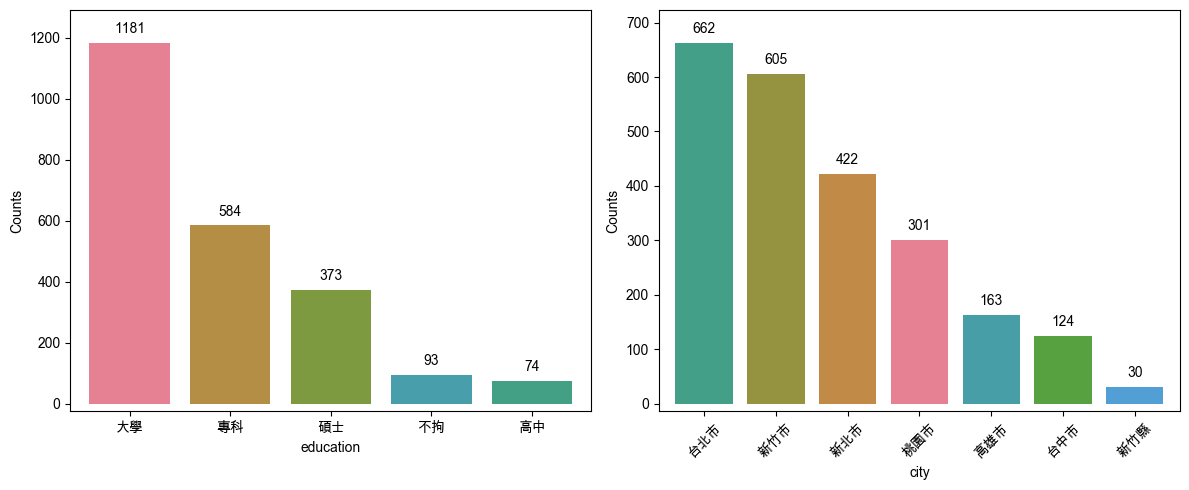

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
da.plot_count(df_education, 'education', ax=axes[0], rotation =0)
da.plot_count(df_city, 'city', ax=axes[1], rotation=45)

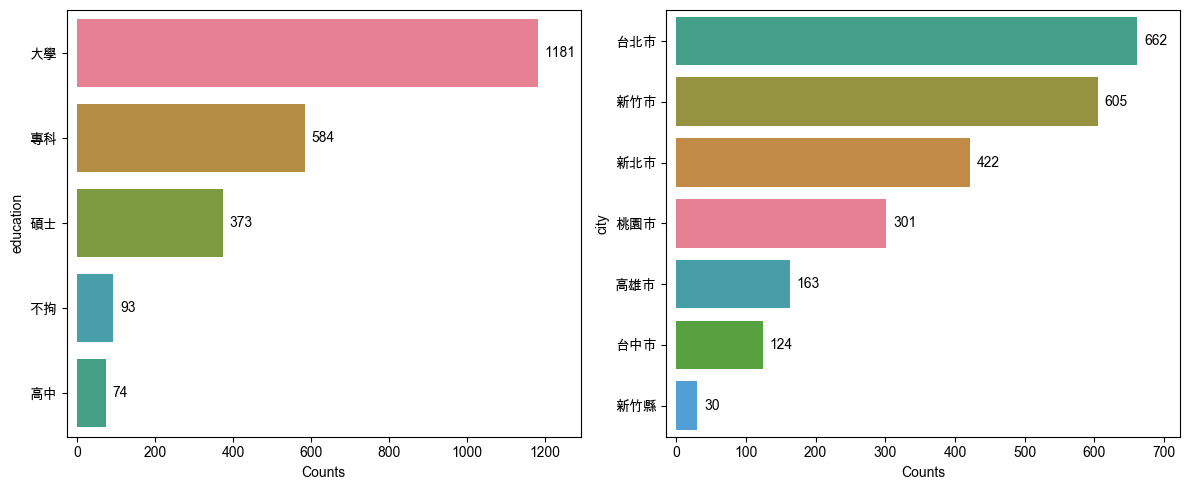

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
da.plot_count(df_education, 'education', ax=axes[0], vertical=False, rotation=0)
da.plot_count(df_city, 'city', ax=axes[1], vertical=False, rotation=0)

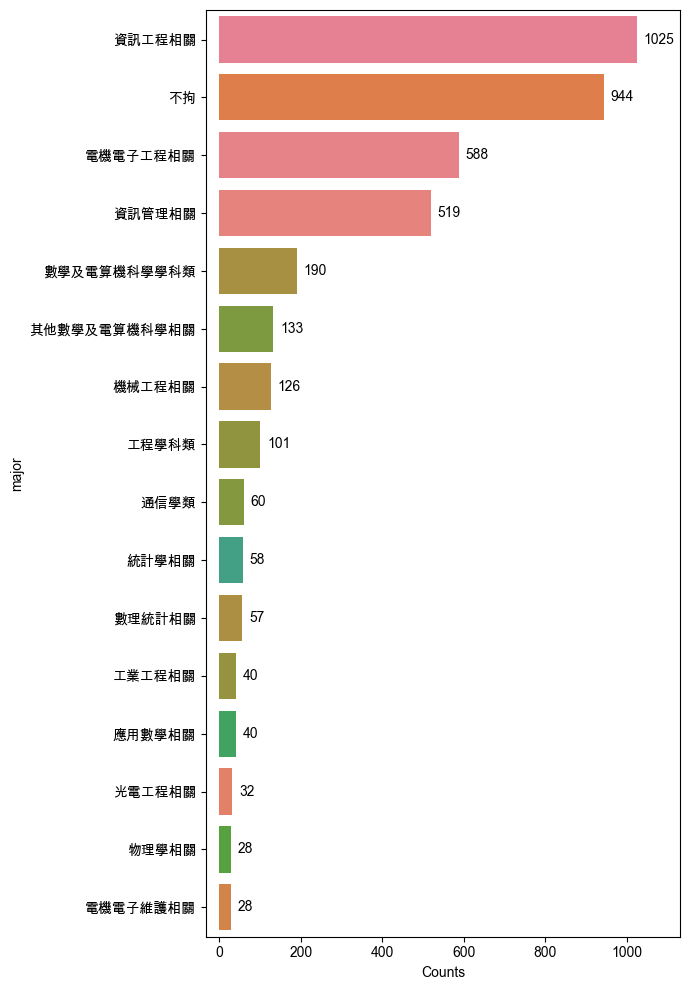

In [48]:
da.plot_count(df_major, 'major', figsize=(7, 10), vertical=False, rotation=0, threshold = 0.5, x_diff=0.03)

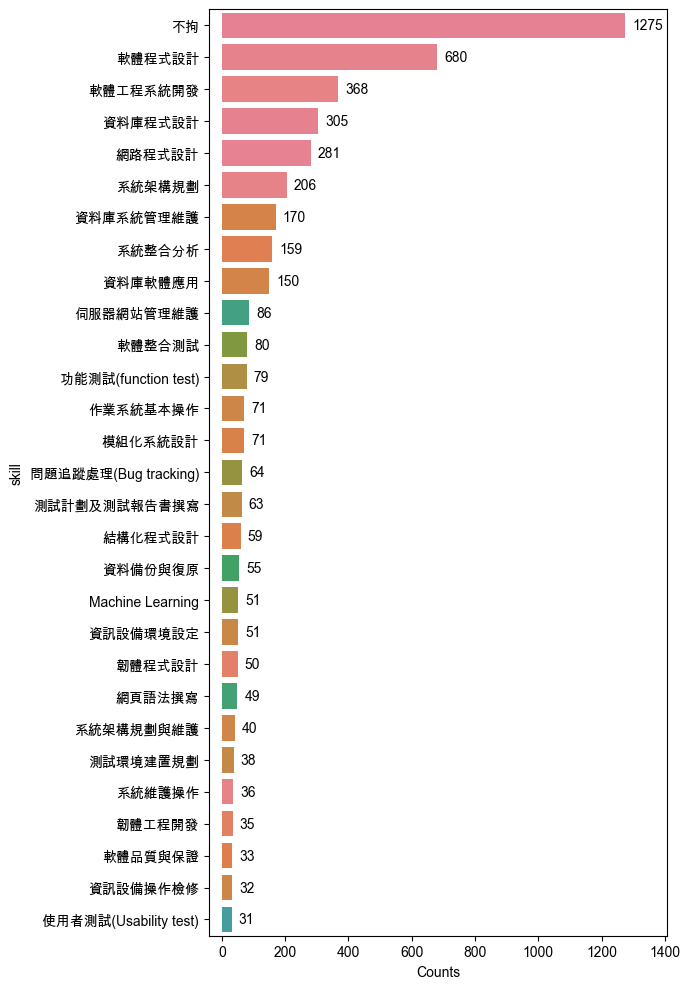

In [49]:
da.plot_count(df_skill, 'skill', figsize=(7, 10), vertical=False, rotation=0, threshold = 0.5, x_diff=0.03)

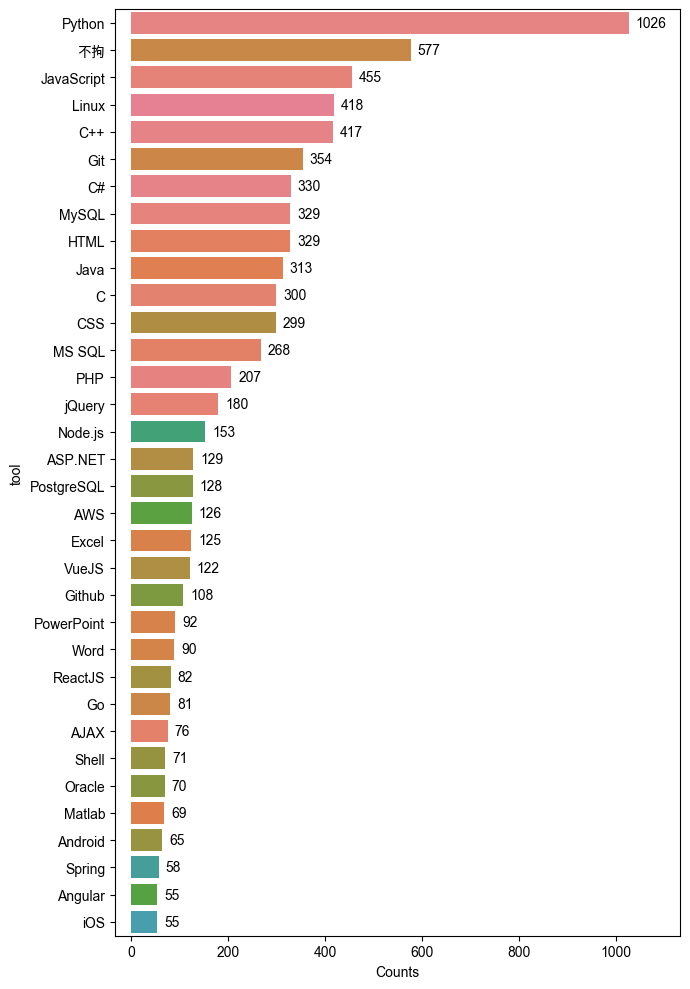

In [50]:
da.plot_count(df_tool, 'tool', figsize=(7, 10), vertical=False, rotation=0, threshold = 0.5, x_diff=0.03)

## 5-3 - Pie Chart

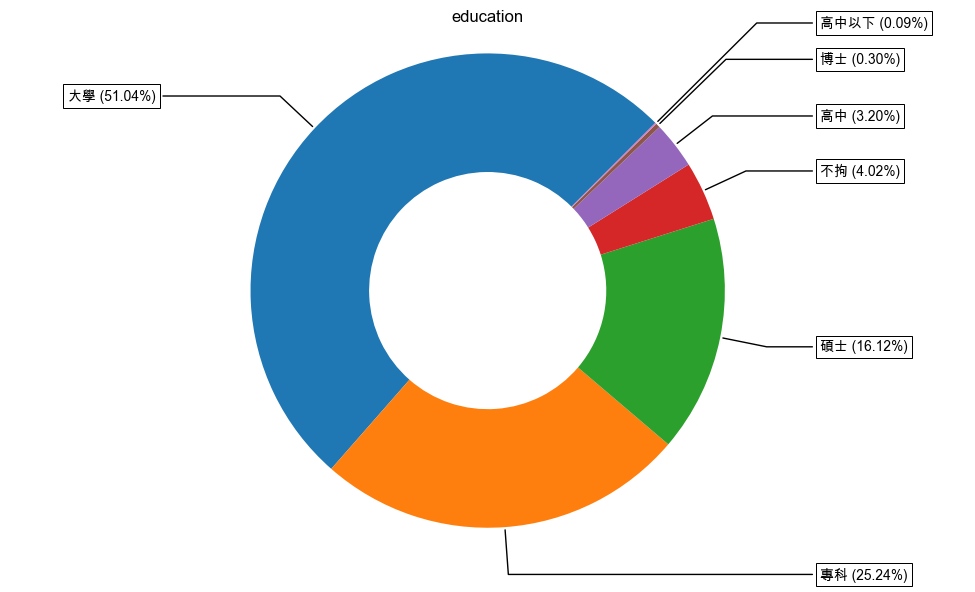

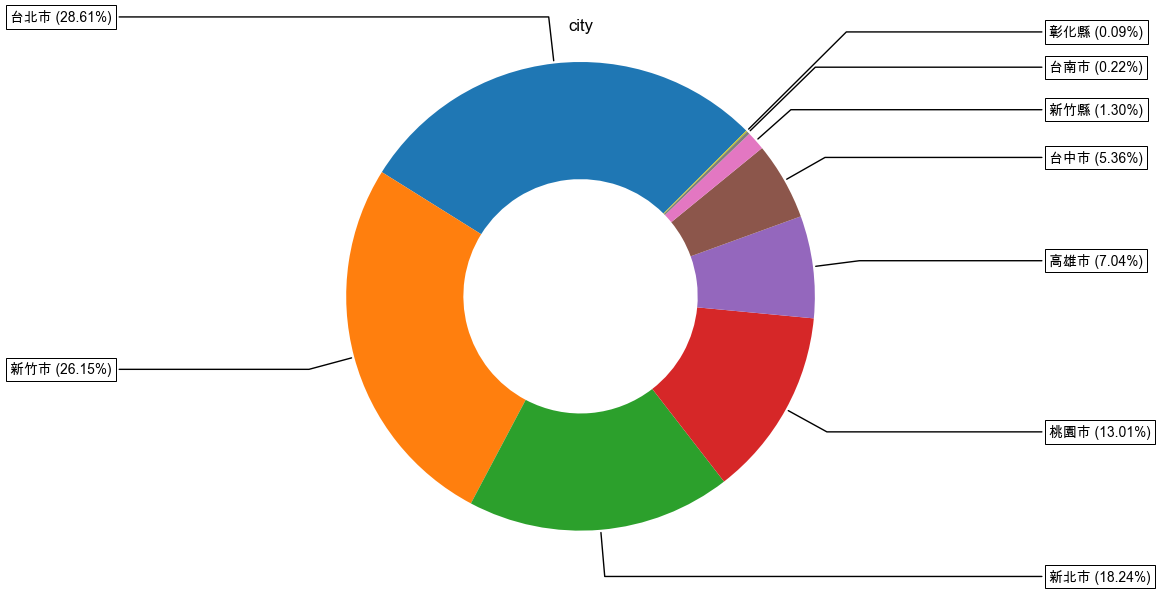

In [51]:
da.plot_pie(df_education, 'education', startangle=45)
da.plot_pie(df_city, 'city', startangle=45, x_move=2, y_move=1.2, y_add=0.2)

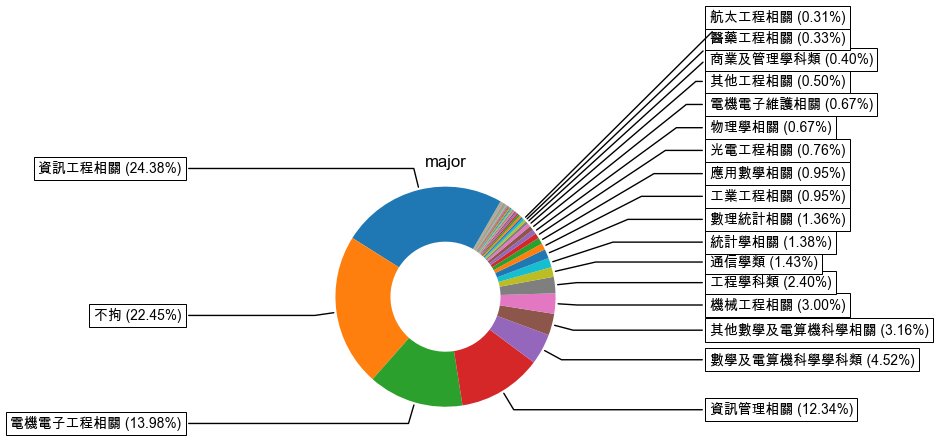

In [52]:
da.plot_pie(df_major, 'major', startangle=60, x_move=2.4, y_move=1.2, y_add=0.2, threshold=0.3)

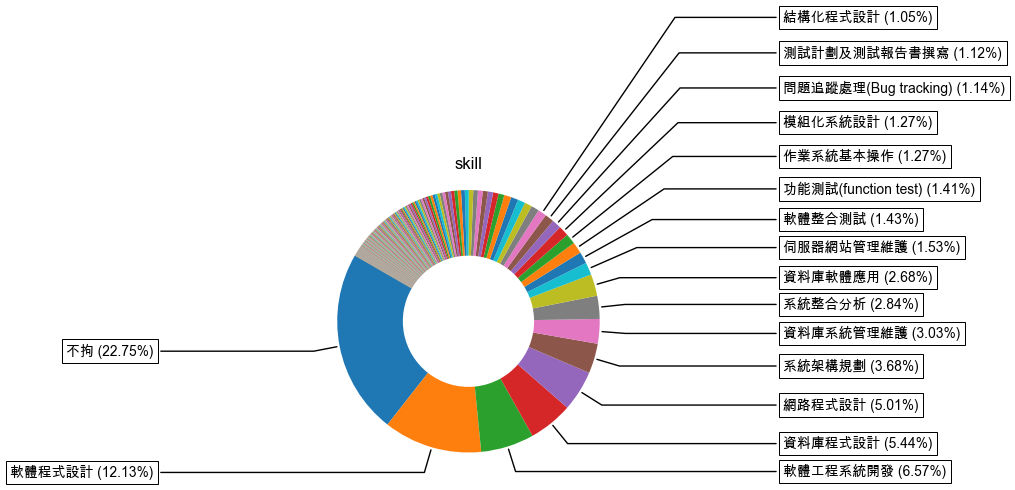

In [53]:
da.plot_pie(df_skill, 'skill', startangle=150, x_move=2.4, y_move=1.2, y_add=0.2, threshold=1)

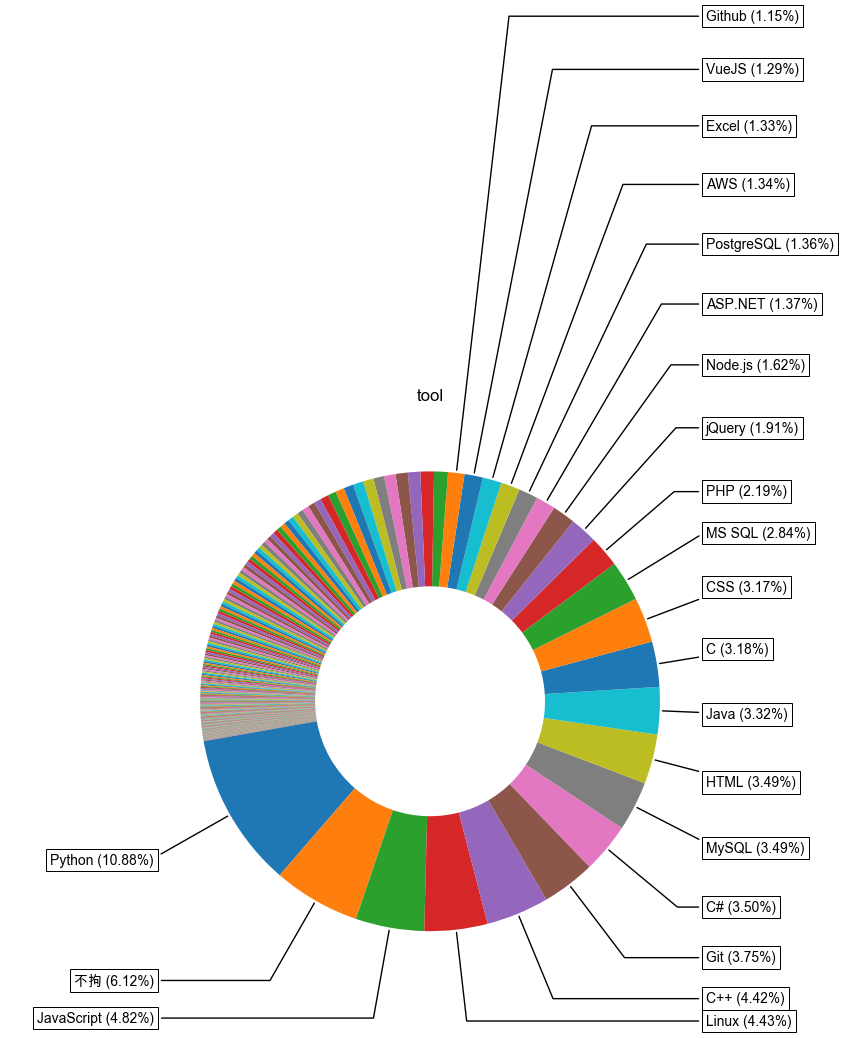

In [54]:
da.plot_pie(df_tool, 'tool', figsize=(12, 14), startangle=190, x_move=1.2, y_move=1.4, y_add=0.2, threshold=1, diff_ang=4)

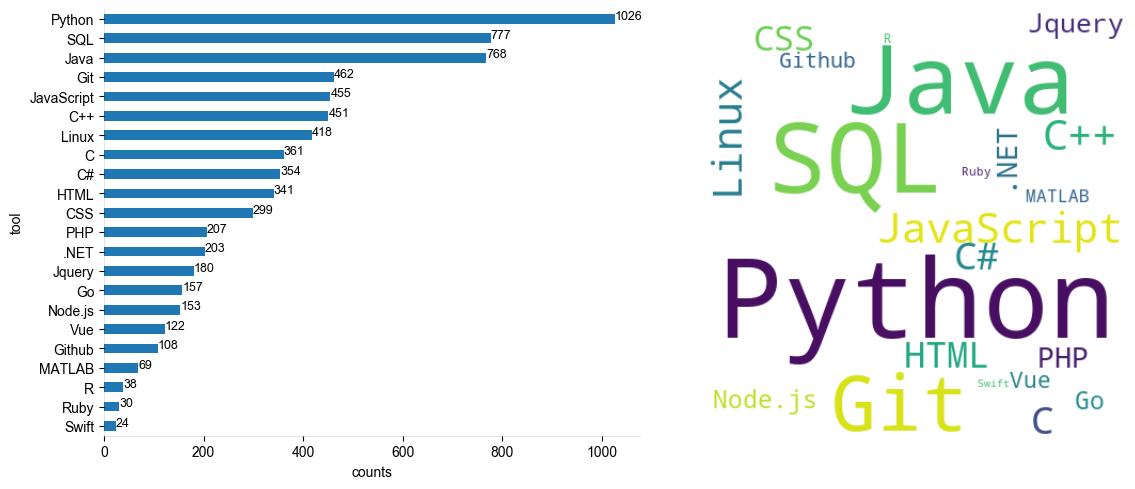

In [57]:
df_tool_new = da.tool_count(df_tool)

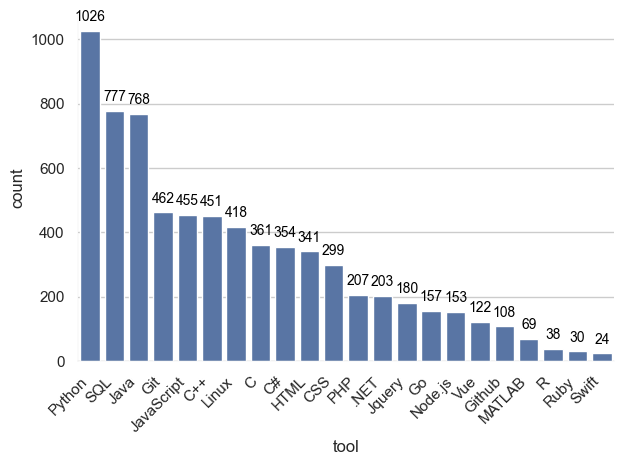

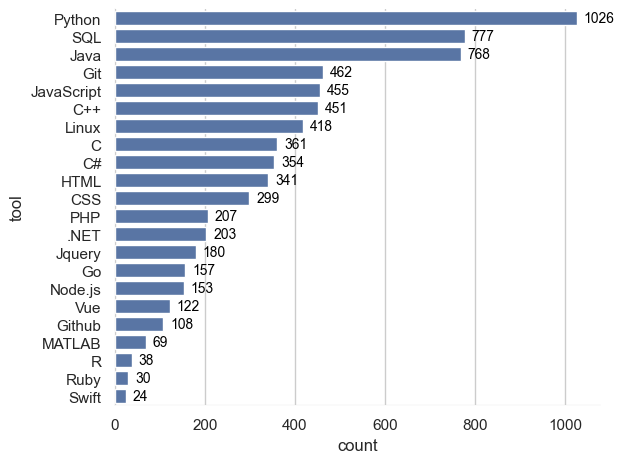

In [58]:
da.plot_bar(df_tool_new, x='tool', y='count', orient='vertical')
da.plot_bar(df_tool_new, x='tool', y='count', orient='horizontal')

# Step 6 - Creating Containers with Docker

## 6-1 - Development Workflow Guide for Docker and Airflow 

1. 安裝 Docker 和 Docker Compose： 首先，確保在開發環境中安裝了 Docker 和 Docker Compose。這些工具將用於構建、運行和管理 Docker 容器。
2. 建立 Dockerfile： 在 Airflow 專案的根目錄中建立一個名為 Dockerfile 的文件。這個文件將定義 Airflow 的運行環境，包括所需的相依性和配置。
3. 建立 Docker Compose 文件： 建立一個名為 docker-compose.yml 的 Docker Compose 文件。在這個文件中，定義 Airflow 的容器配置，包括 Airflow 服務本身以及任何其他相關的服務，如數據庫。
4. 編寫 Dockerfile 和 Docker Compose 文件： 在這些文件中定義所需的相依性、環境變數和配置，以及容器之間的連接。
5. 構建 Docker 容器： 使用 Docker Compose 命令構建和運行容器。運行 docker-compose up 命令將會構建並啟動所有在 docker-compose.yml 文件中定義的容器。
6. 測試 Airflow 工作流程： 一旦容器運行起來，可以在本地測試 Airflow 工作流程。可以使用 Airflow 的命令列工具來測試和調試工作流程。
7. 部署到其他環境： 當開發和測試完成後，可以將 Docker 容器部署到其他環境，如測試或生產環境中。這可以通過將容器映像推送到容器註冊表並在目標環境中運行容器來實現。
8. 監控和維護： 確保在生產環境中設置了監控和警報系統，以及定期維護 Docker 容器和 Airflow 服務。

In [ ]:
# Ｔest

# Step 7 - Configuring Airflow for Task Scheduling

# Step 99. Test Area - 測試區域
